In [ ]:
#%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

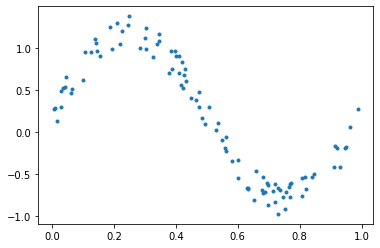

In [ ]:
N = 100
X = np.random.rand(N, 1)
Y = np.sin(2 * np.pi * X) + 0.4 * np.random.rand(N, 1)
plt.plot(X, Y, '.')
plt.show()

In [ ]:
#  1--W1--100--W2--100--W3--1
W1 = tf.Variable(np.random.randn(1, 100))
b1 = tf.Variable(np.random.randn(100))
W2 = tf.Variable(np.random.randn(100, 100))
b2 = tf.Variable(np.random.randn(100))
W3 = tf.Variable(np.random.randn(100, 1))
b3 = tf.Variable(np.random.randn(1))

def relu(x):
  return tf.where(x>=0, x, 0)

lr = 0.0001
for epoch in range(7000):
  with tf.GradientTape() as t:
    y = relu(X @ W1 + b1)
    y = relu(y @ W2 + b2)
    y = y @ W3 + b3
    loss = tf.reduce_mean((y - Y)**2)
  dW1, db1, dW2, db2, dW3, db3 = t.gradient(loss, [W1, b1, W2, b2, W3, b3])
  W1.assign_sub(lr * dW1)
  b1.assign_sub(lr * db1)
  W2.assign_sub(lr * dW2)
  b2.assign_sub(lr * db2)
  W3.assign_sub(lr * dW3)
  b3.assign_sub(lr * db3)
  if epoch % 1000 == 0:
    print(loss.numpy())

213.3065012674625
0.04505213363157745
0.025556976385824753
0.02047112210275665
0.018004130612793635
0.017054437828000937
0.016514699216436026


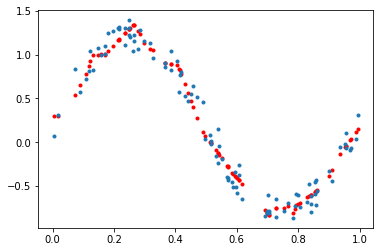

In [ ]:
Z = relu(X @ W1 + b1)
Z = relu(Z @ W2 + b2)
Z = Z @ W3 + b3
plt.plot(X, Z, '.r')
plt.plot(X, Y, '.')
plt.show()

In [ ]:
def relu(x):
  return tf.where(x>=0, x, 0)

class MLP():
  def __init__(self, neurons=[1, 100, 100, 1], activation=[relu, relu, None]):
    self.W = []
    self.activation = activation
    for i in range(1, len(neurons)):
      self.W.append(tf.Variable(np.random.randn(neurons[i-1], neurons[i]))) # W
      self.W.append(tf.Variable(np.random.randn(neurons[i]))) # b
  def __call__(self, x):
    for i in range(0, len(self.W), 2):
      x = x @ self.W[i] + self.W[i+1]
      if self.activation[i // 2] is not None:
        x = self.activation[i // 2](x)
    return x

In [ ]:
lr = 0.0001
model = MLP()
for epoch in range(7000):
  with tf.GradientTape() as t:
    loss = tf.reduce_mean((model(X) - Y)**2)
  dW = t.gradient(loss, model.W)
  for i, W in enumerate(model.W):
    W.assign_sub(lr * dW[i])
  if epoch % 1000 == 0:
    print(loss.numpy())

1594.1880003636368
0.023365970928223255
0.017736409932721867
0.01574028692737814
0.014984476197675105
0.014556954440451448
0.014108217645886614


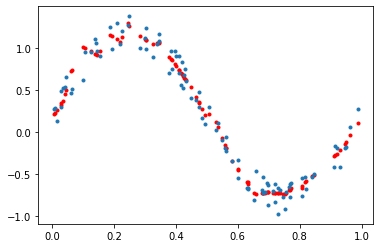

In [ ]:
Z = model(X)
plt.plot(X, Z, '.r')
plt.plot(X, Y, '.')
plt.show()